# Models without Dimensionality Reduction (4 class)

## Import library and dataset

In [12]:
# Import libraries
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
#import tkinter
from matplotlib import pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import scikitplot as skplt
import seaborn as sns
sns.set(style="whitegrid")

#from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn import model_selection

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import matplotlib
matplotlib.use('TKAgg')
%matplotlib inline

## Load Dataset, Scaling

In [13]:
# Load 2 datasets
dfC = pd.read_csv("MeterC",sep='\t',header=None, names=['flatr','symm','crossf','v1','v2','v3','v4','sos1','sos2','sos3','sos4','ss11','ss12','ss21','ss22','ss31','ss32','ss41','ss42','sq11','sq12','sq21','sq22','sq31','sq32','sq41','sq42','gain11','gain12','gain21','gain22','gain31','gain32','gain41','gain42','tt11','tt12','tt21','tt22','tt31','tt32','tt41','tt42','class'])
dfD = pd.read_csv("MeterD",sep='\t',header=None, names=['flatr','symm','crossf','v1','v2','v3','v4','sos1','sos2','sos3','sos4','ss11','ss12','ss21','ss22','ss31','ss32','ss41','ss42','sq11','sq12','sq21','sq22','sq31','sq32','sq41','sq42','gain11','gain12','gain21','gain22','gain31','gain32','gain41','gain42','tt11','tt12','tt21','tt22','tt31','tt32','tt41','tt42','class'])

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['flatr','symm','crossf','v1','v2','v3','v4','sos1','sos2','sos3','sos4','ss11','ss12','ss21','ss22','ss31','ss32','ss41','ss42','sq11','sq12','sq21','sq22','sq31','sq32','sq41','sq42','gain11','gain12','gain21','gain22','gain31','gain32','gain41','gain42','tt11','tt12','tt21','tt22','tt31','tt32','tt41','tt42']

X = dfC.loc[:, features].values
y = dfC.loc[:,['class']].values
X = scaler.fit_transform(X)

#process for dataset D
Xd = dfD.loc[:, features].values
yd = dfD.loc[:,['class']].values
Xd = scaler.fit_transform(Xd)

#change the shape of y from column array to horizontal array or (n_samples, ) using ravel().
y = y.ravel()
print('y class',dfC['class'].unique())
yd = yd.ravel()
print('yd class',dfD['class'].unique())

y class [1 2 3 4]
yd class [1 2 3 4]


## Evaluate using K-fold validation

In [20]:
#classifier models
clfNB = GaussianNB()
clfKNN = KNeighborsClassifier(n_neighbors=5)
clfSVM = svm.SVC(kernel='linear', C=1, probability=True)
clfRF = RandomForestClassifier(max_depth=2, random_state=0)
clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1, max_iter=2500)

n_folds = [5,10]
targets = [clfNB,clfKNN,clfSVM,clfRF,clfNN]
models = ['Bayes','KNN','SVM','RF','ANN']
# Computing training scores to get insights on how different parameter settings impact the overfitting/underfitting trade-off. 
# However computing the scores on the training set can be computationally expensive and is not strictly required 
# to select the parameters that yield the best generalization performance

print("\n{:>10} | {:>10} | {:>8} | {:>10} | {:>10} | {:>9},{:>9},{:>7} | {:>9},{:>9},{:>8}".format('Classifier', 'Test_Accy_5f', 'Test_Accy_10f', 'Val_Accy_5f','Val_Accy_10f','F1micro5','F1macro5','F1avg5','F1micro10','F1macro10','F1avg10'))
print('-----------------------------------------------------------------------------------------------------------------------------------')
for i,j in zip(targets,models):
    # K-fold cross validation for the training dataset (Dataset C)
    cv5 = cross_validate(i, X, y, cv=5, return_train_score=True) # == cvScore = cross_val_score(i, X, y, cv=5)
    cv10 = cross_validate(i, X, y, cv=10, return_train_score=True)    
    cv5mean = np.round(cv5['test_score'].mean(),decimals=3)
    cv10mean = np.round(cv10['test_score'].mean(),decimals=3)
    # K-fold cross validation and predict for the validation dataset (Dataset D)
    y_pred5 = cross_val_predict(i, Xd, yd, cv=5)
    y_pred10 = cross_val_predict(i, Xd, yd, cv=10)
    # Evaluate performance for validation score
    accuracy5 = np.round(accuracy_score(yd, y_pred5),decimals=3)
    accuracy10 = np.round(accuracy_score(yd, y_pred10),decimals=3)
    f1micro5 = np.round(f1_score(yd, y_pred5, average='macro'),decimals=3)
    f1macro5 = np.round(f1_score(yd, y_pred5, average='micro'),decimals=3)
    f1avg5 = np.round(f1_score(yd, y_pred5, average='weighted'),decimals=3)
    f1micro10 = np.round(f1_score(yd, y_pred10, average='macro'),decimals=3)
    f1macro10 = np.round(f1_score(yd, y_pred10, average='micro'),decimals=3)
    f1avg10 = np.round(f1_score(yd, y_pred10, average='weighted'),decimals=3)
    print("{:>10} | {:>12} | {:>13} | {:>11} | {:>11}  | {:>9}{:>9}{:>9} | {:>9}{:>9}{:>9}".format(j,cv5mean,cv10mean,accuracy5,accuracy10,f1micro5,f1macro5,f1avg5,f1micro10,f1macro10,f1avg10))



Classifier | Test_Accy_5f | Test_Accy_10f | Val_Accy_5f | Val_Accy_10f |  F1micro5, F1macro5, F1avg5 | F1micro10,F1macro10, F1avg10
-----------------------------------------------------------------------------------------------------------------------------------
     Bayes |        0.592 |         0.637 |       0.839 |       0.878  |     0.851    0.839    0.841 |     0.883    0.878    0.878
       KNN |        0.636 |         0.746 |       0.689 |       0.789  |     0.642    0.689    0.678 |     0.774    0.789    0.787
       SVM |        0.503 |         0.597 |       0.794 |       0.811  |     0.785    0.794    0.789 |     0.814    0.811    0.807
        RF |        0.618 |          0.79 |       0.717 |       0.761  |     0.707    0.717    0.675 |     0.755    0.761    0.727
       ANN |        0.745 |         0.934 |       0.794 |       0.833  |     0.807    0.794    0.796 |     0.846    0.833    0.835


## Evaluate using Train and Test set

In [13]:
#split dataset into train and test set
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=100)

In [14]:
print("\n{:>10} | {:>10} | {:>10} | {:>9},{:>9},{:>7} | {:>9},{:>9},{:>8}".format('Classifier', 'AccuracyC','AccuracyD','F1microC','F1macroC','F1avgC','F1microD','F1macroD','F1avgD'))
print('-------------------------------------------------------------------------------------------------')
for i,j in zip(targets,models):
    i.fit(X_train, Y_train) # train the model
    accuracyC = np.round(i.score(X_test, Y_test),decimals=3) # Calc accuracy score for the training dataset (Dataset C)
    accuracyD = np.round(i.score(Xd, yd),decimals=3) # Calc accuracy score for the validation dataset (Dataset D)
    # Evaluate performance for validation score
    y_predC = i.predict(X_test)
    y_predD = i.predict(Xd)
    f1microC = np.round(f1_score(Y_test, y_predC, average='macro'),decimals=3)
    f1macroC = np.round(f1_score(Y_test, y_predC, average='micro'),decimals=3)
    f1avgC = np.round(f1_score(Y_test, y_predC, average='weighted'),decimals=3)
    f1microD = np.round(f1_score(yd, y_predD, average='macro'),decimals=3)
    f1macroD = np.round(f1_score(yd, y_predD, average='micro'),decimals=3)
    f1avgD = np.round(f1_score(yd, y_predD, average='weighted'),decimals=3)
    print("{:>10} | {:>10} | {:>10} | {:>9}{:>9}{:>9} | {:>9}{:>9}{:>9}".format(j,accuracyC,accuracyD,f1microC,f1macroC,f1avgC,f1microD,f1macroD,f1avgD))



Classifier |  AccuracyC |  AccuracyD |  F1microC, F1macroC, F1avgC |  F1microD, F1macroD,  F1avgD
-------------------------------------------------------------------------------------------------
     Bayes |      0.568 |      0.122 |     0.595    0.568     0.53 |     0.054    0.122    0.028
       KNN |      0.757 |        0.2 |     0.678    0.757    0.747 |     0.168      0.2    0.195
       SVM |      0.568 |      0.194 |     0.565    0.568    0.552 |     0.198    0.194    0.217
        RF |      0.811 |      0.467 |     0.727    0.811    0.794 |     0.355    0.467    0.386
       ANN |      0.946 |      0.161 |     0.896    0.946    0.939 |       0.2    0.161    0.188


## Classification Report

In [20]:
for i,j in zip(targets,models):
    i.fit(X_train, Y_train)
    y_pred = i.predict(X_test)
    print(j,'Classification Report for Test Set:\n', classification_report(Y_test, y_pred))
print('-------------------------------------------------------------------------------------------------')
for i,j in zip(targets,models):
    i.fit(X_train, Y_train)
    y_pred = i.predict(Xd)
    print(j,'Classification Report for Validation Set:\n', classification_report(yd, y_pred))


Bayes Classification Report for Test Set:
               precision    recall  f1-score   support

           1       0.40      0.25      0.31         8
           2       1.00      1.00      1.00         4
           3       0.46      1.00      0.63        11
           4       1.00      0.29      0.44        14

    accuracy                           0.57        37
   macro avg       0.71      0.63      0.60        37
weighted avg       0.71      0.57      0.53        37

KNN Classification Report for Test Set:
               precision    recall  f1-score   support

           1       0.55      0.75      0.63         8
           2       1.00      0.25      0.40         4
           3       0.73      1.00      0.85        11
           4       1.00      0.71      0.83        14

    accuracy                           0.76        37
   macro avg       0.82      0.68      0.68        37
weighted avg       0.82      0.76      0.75        37

SVM Classification Report for Test Set:
      

C:\Users\SMFIRDAUS\miniconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\SMFIRDAUS\miniconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



RF Classification Report for Validation Set:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        51
           2       0.38      0.13      0.19        23
           3       0.49      0.93      0.64        55
           4       0.59      0.59      0.59        51

    accuracy                           0.47       180
   macro avg       0.36      0.41      0.35       180
weighted avg       0.36      0.47      0.39       180

ANN Classification Report for Validation Set:
               precision    recall  f1-score   support

           1       0.38      0.12      0.18        51
           2       0.33      0.26      0.29        23
           3       0.35      0.31      0.33        55
           4       0.00      0.00      0.00        51

    accuracy                           0.16       180
   macro avg       0.26      0.17      0.20       180
weighted avg       0.25      0.16      0.19       180



## Confusion Matrix

In [31]:
for i,j in zip(targets,models):
    # K-fold cross validation for the training dataset (Dataset C)
    y_predC5 = cross_val_predict(i, X, y, cv=5)
   # print(j,'Confusion Matrix for Test Set (5-fold):\n',confusion_matrix(y, y_predC5))
    print('\n',j,'Confusion Matrix for Test Set (5-fold):\n',confusion_matrix(y, y_predC5))
    
print('--------------------------------------------------------')
      
for i,j in zip(targets,models):
    # K-fold cross validation and predict for the validation dataset (Dataset D)
    y_predD5 = cross_val_predict(i, Xd, yd, cv=5)
   # print(j,'Confusion Matrix for Test Set (5-fold):\n',confusion_matrix(y, y_predC5))
    print('\n',j,'Confusion Matrix for Validation Set (5-fold):\n',confusion_matrix(yd, y_predD5))


 Bayes Confusion Matrix for Test Set (5-fold):
 [[21  0 33  0]
 [ 2 19  0  2]
 [ 4  0 50  0]
 [12  9 12 17]]

 KNN Confusion Matrix for Test Set (5-fold):
 [[40  0  8  6]
 [ 6 11  3  3]
 [14  0 34  6]
 [17  0  3 30]]

 SVM Confusion Matrix for Test Set (5-fold):
 [[17  0 30  7]
 [ 5 11  3  4]
 [18  0 36  0]
 [21  0  2 27]]

 RF Confusion Matrix for Test Set (5-fold):
 [[40  0  8  6]
 [ 8  4  1 10]
 [17  0 34  3]
 [10  6  0 34]]

 ANN Confusion Matrix for Test Set (5-fold):
 [[45  0  2  7]
 [ 3 17  3  0]
 [13  0 41  0]
 [11  7  0 32]]
--------------------------------------------------------

 Bayes Confusion Matrix for Validation Set (5-fold):
 [[38  0 13  0]
 [ 4 19  0  0]
 [12  0 43  0]
 [ 0  0  0 51]]

 KNN Confusion Matrix for Validation Set (5-fold):
 [[26  0 25  0]
 [ 8  6  9  0]
 [14  0 41  0]
 [ 0  0  0 51]]

 SVM Confusion Matrix for Validation Set (5-fold):
 [[28  0 23  0]
 [ 7 14  2  0]
 [ 5  0 50  0]
 [ 0  0  0 51]]

 RF Confusion Matrix for Validation Set (5-fold):
 [[ 8  

## ROC and AUC Multiclass

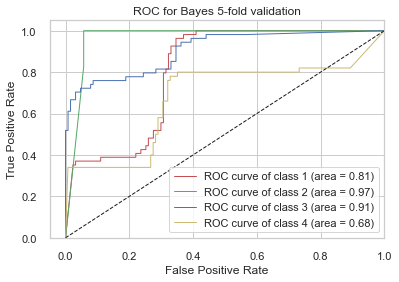

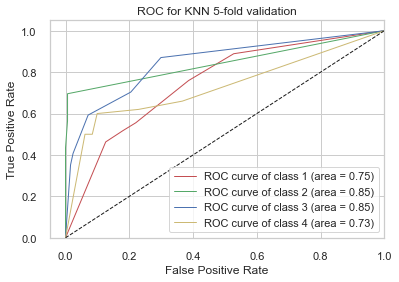

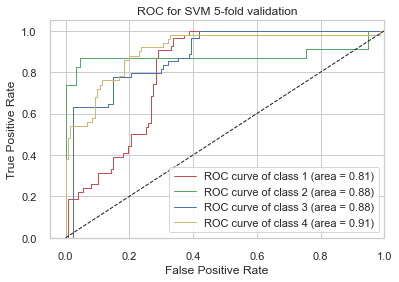

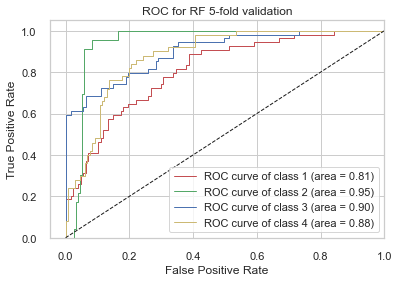

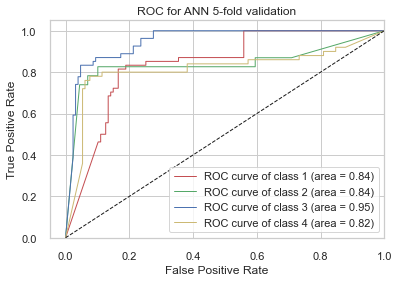

In [35]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

y_bin = label_binarize(y, classes=[1,2,3,4])
n_classes = y_bin.shape[1]
targets = [clfNB,clfKNN,clfSVM, clfRF,clfNN]
models = ['Bayes','KNN','SVM','RF','ANN']

for i,j in zip(targets,models):
    y_score = cross_val_predict(i, X, y, cv=5 ,method='predict_proba')
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['r', 'g', 'b','y'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i+1, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for ' + str(j) + ' 5-fold validation')
    plt.legend(loc="lower right")
    plt.show()


## Tuning KNN

[0.8953216374269006, 0.8178362573099415, 0.789766081871345, 0.695906432748538, 0.7456140350877194, 0.6634502923976608, 0.6964912280701754, 0.6467836257309942, 0.6356725146198831, 0.6409356725146199, 0.6298245614035088, 0.6298245614035088, 0.6298245614035088, 0.6131578947368421, 0.591812865497076, 0.5695906432748539, 0.5532163742690058, 0.554093567251462, 0.5485380116959064, 0.565204678362573, 0.554093567251462, 0.4985380116959064, 0.4874269005847953, 0.47631578947368425, 0.4871345029239766, 0.4871345029239766, 0.47046783625731, 0.4593567251461989, 0.4593567251461989, 0.4760233918128655]


Text(0, 0.5, 'Cross-validated accuracy')

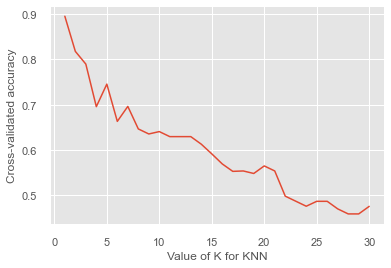

In [10]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []

for k in k_range:
    clfKNN2 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clfKNN2, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

We choose 5 as the optimum K number